In [2]:
import pandas as pd
from sqlalchemy import create_engine

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100.0)

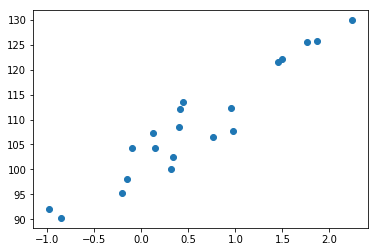

In [5]:
plt.scatter(X, y)

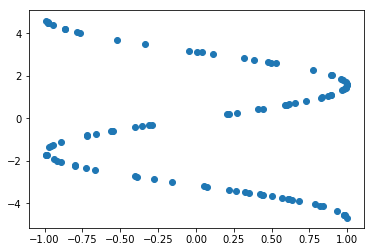

In [6]:
from sklearn.datasets import make_s_curve

data, color = make_s_curve(100, random_state=0)
plt.scatter(data[:,0], color)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [9]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [12.44002424]
y-axis intercept:  101.89622505659258


In [10]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 98.01970393090812
Predicted output: 100.01333771669648
Prediction Error: 1.9936337857883615


In [11]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,100.013338,98.019704,1.993634
1,106.874190,108.458654,-1.584464
2,114.071749,107.776544,6.295205
3,91.271253,90.315201,0.956053
4,89.738865,92.047965,-2.309101
5,105.790795,100.144726,5.646069
6,100.612180,104.371286,-3.759106
7,99.344051,95.208967,4.135085
8,106.047142,102.505262,3.541880
9,120.482605,122.119661,-1.637056


In [16]:
x_min = X.min()
x_max = X.max()
y_min_actual = y.min()
y_max_actual = y.max()

In [17]:
y_min_predicted = model.predict(x_min)
y_max_predicted = model.predict(x_max)
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 90.31520078064568
Predicted Min Value: [89.73886454]
Actual Max Value: 129.85715020208258
Predicted Max Value: [129.77299077]


In [18]:
#create csvs into dataframes

disease_file = "vaccine-preventable-disease-cases-by-county-and-year-2.csv"
disease_df = pd.read_csv(disease_file)
disease_df.head()

,disease,county,year,count
0,Diphtheria,Alameda,2001,0
1,Diphtheria,Alameda,2002,0
2,Diphtheria,Alameda,2003,0
3,Diphtheria,Alameda,2004,0
4,Diphtheria,Alameda,2005,0


In [19]:

#use pandas to read data
disease_file_pd = pd.read_csv(disease_file)
disease_file_pd.head()

,disease,county,year,count
0,Diphtheria,Alameda,2001,0
1,Diphtheria,Alameda,2002,0
2,Diphtheria,Alameda,2003,0
3,Diphtheria,Alameda,2004,0
4,Diphtheria,Alameda,2005,0


In [20]:
#display a statistical overview of the DataFrame 
disease_file_pd.describe()

,year,count
count,7670.000000,7670.000000
mean,2010.638462,14.427249
std,4.733179,199.746996
min,2001.000000,0.000000
25%,2007.000000,0.000000
50%,2012.000000,0.000000
75%,2015.000000,1.000000
max,2017.000000,11206.000000


In [23]:
#the mean method avergae the series 
average = disease_file_pd["count"].mean()
average

14.427249022164276

In [24]:
count = disease_file_pd["county"].value_counts()
count

Orange             130
Lassen             130
San Mateo          130
Nevada             130
Santa Barbara      130
Humboldt           130
Mono               130
Contra Costa       130
El Dorado          130
Santa Cruz         130
Placer             130
Merced             130
San Joaquin        130
Stanislaus         130
Glenn              130
Lake               130
Mariposa           130
Trinity            130
Modoc              130
Alameda            130
Santa Clara        130
Del Norte          130
Yuba               130
San Benito         130
San Bernardino     130
Tulare             130
San Francisco      130
Alpine             130
Mendocino          130
Amador             130
Tuolumne           130
Imperial           130
Siskiyou           130
Monterey           130
Butte              130
Sacramento         130
Napa               130
Riverside          130
Calaveras          130
Sierra             130
Ventura            130
Inyo               130
Sutter             130
Sonoma     

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
X = disease_df[['year']]
y = disease_df['count']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
predictions = lm.predict(X_test)

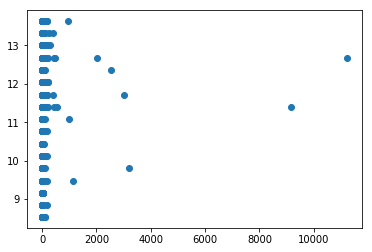

In [31]:
plt.scatter(y_test, predictions)